<a href="https://colab.research.google.com/github/nupurrana451/Machine-Learning-Projects/blob/main/HousingPricesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Workflow:


1.   Importing Data
2.   EDA
3. Data Preprocessing
4. Train Test Split
5. Model evaluation
6. Prediction system

# **Importing libraries**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

# Importing dataset

In [2]:
house_data=pd.read_csv('/content/BostonHousing.csv')
house_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


crim
per capita crime rate by town.

zn
proportion of residential land zoned for lots over 25,000 sq.ft.

indus
proportion of non-retail business acres per town.

chas
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

nox
nitrogen oxides concentration (parts per 10 million).

rm
average number of rooms per dwelling.

age
proportion of owner-occupied units built prior to 1940.

dis
weighted mean of distances to five Boston employment centres.

rad
index of accessibility to radial highways.

tax
full-value property-tax rate per $10,000.

ptratio
pupil-teacher ratio by town.

b
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

lstat
lower status of the population (percent).

price
median value of owner-occupied homes in $1000s.

# Exploratory Data Analysis

In [3]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


<Axes: >

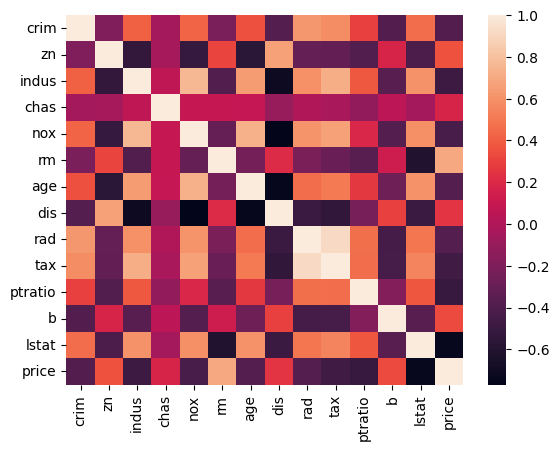

In [4]:
sns.heatmap(house_data.corr())

features like crime rate, industries, lstat, nitrogen oxide concentration, age, tax, pupil-teacher rtio show negative correlation with the prices while number of rooms show a positive correlation.

# Train Test Split

In [9]:
X=house_data.drop('price',axis=1)
Y=house_data['price']

In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

# Model Training

In [12]:
model=XGBRegressor()
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [13]:
training_data_prediction=model.predict(X_train)

In [14]:
score_1=metrics.r2_score(Y_train,training_data_prediction)
score_2=metrics.mean_absolute_error(Y_train,training_data_prediction)
print('R squared error: ',score_1)
print('Mean absolute error: ',score_2)

R squared error:  0.9999980039471451
Mean absolute error:  0.0091330346494618


In [15]:
test_data_prediction=model.predict(X_test)

In [16]:
score_1=metrics.r2_score(Y_test,test_data_prediction)
score_2=metrics.mean_absolute_error(Y_test,test_data_prediction)
print('R squared error: ',score_1)
print('Mean absolute error: ',score_2)

R squared error:  0.9051721149855378
Mean absolute error:  2.0748727686264927


Text(0.5, 1.0, 'Actual prices vs Predicted prices')

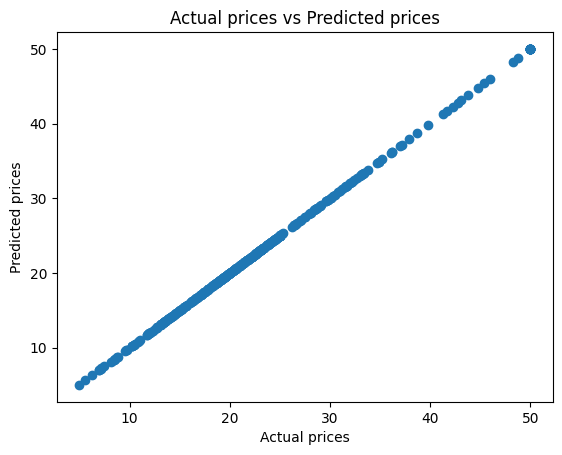

In [18]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual prices vs Predicted prices')